In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import mdtraj as md
import pandas as pd

In [2]:
#load the trajectory files
trr_file = ('./adp_exchange4temps.trr')
gro_file = ('./adp_exchange4temps.gro')
traj = md.load(trr_file , top = gro_file)

In [3]:
#printing the trajectory data
print(traj)

<mdtraj.Trajectory with 5001 frames, 22 atoms, 3 residues, and unitcells>


In [4]:
#printing the traj.time
print(traj.time.size)

5001


In [5]:
#compute phi and psi angles
phi = md.compute_phi(traj, periodic = True)
psi = md.compute_psi(traj, periodic = True)

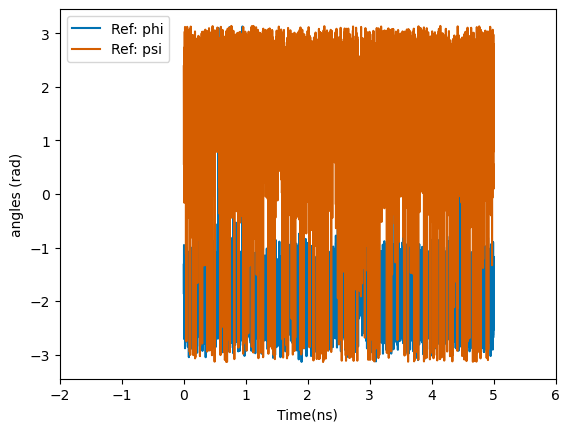

In [6]:
# plot phi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, phi[1][:,0], color='#0072B2')
# plot psi, time in ns, colorblind-friendly
plt.plot(traj.time/1000, psi[1][:,0], color='#D55E00')
plt.xlabel('Time(ns)')
plt.xlim(-2, 6)
plt.ylabel('angles (rad)')
plt.legend(['Ref: phi', 'Ref: psi'])

-3.137899160385132
3.1309688091278076


/state/partition1/job-25992179/ipykernel_3973942/4049803039.py:6: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)       #Similar to the equation of free energy (-RTln(K))


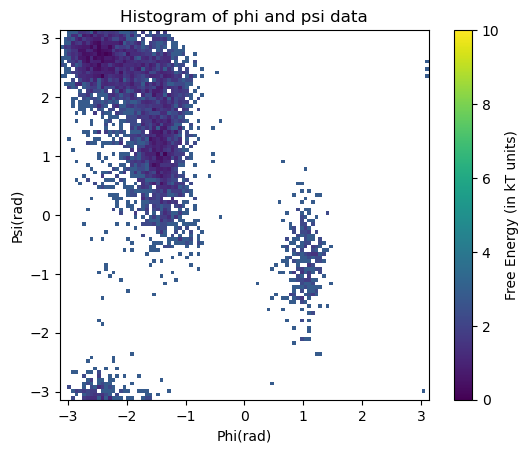

In [15]:
# compute a 2D histogram of the phi, psi data and plot the -log(histogram)
H, xedges, yedges = np.histogram2d(phi[1].flatten(), psi[1].flatten(), bins = 100)
print(xedges[0])
print(xedges[-1])
H = H.T              #Finding the transpopse of H
H = -np.log(H)       #Similar to the equation of free energy (-RTln(K))
H -= H.min()
plt.imshow(H, interpolation = 'nearest', origin = 'lower', extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('Phi(rad)')
plt.ylabel('Psi(rad)')
cbar = plt.colorbar()
plt.clim(0.0, 10.0)
cbar.set_label('Free Energy (in kT units)', rotation=90)
plt.title('Histogram of phi and psi data')
#plt.pcolor(phi[1], psi[1], f(data), cmap=cm, vmin=0, vmax=10)
plt.savefig('../Figures/angles_hist_REMD_600.png')

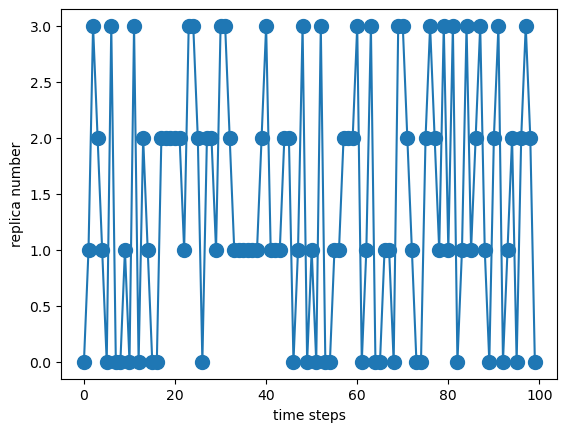

In [16]:
xvg_600 = np.loadtxt('./replica_index.xvg')
plt.plot(xvg_600[::1000,1], label='Replica', marker = 'o', markersize = 10)
plt.xlabel('time steps')
plt.ylabel('replica number')
plt.savefig('../Figures/replica_index_600.png')

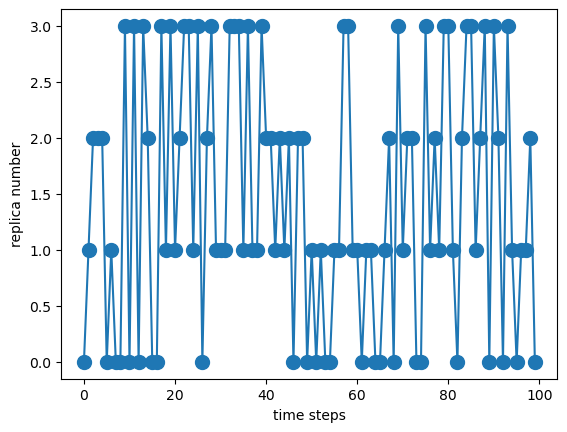

In [17]:
xvg_600_temp = np.loadtxt('./replica_temp.xvg')
plt.plot(xvg_600_temp[::1000,1], label='Temp', marker = 'o', markersize = 10)
plt.xlabel('time steps')
plt.ylabel('replica number')
plt.savefig('../Figures/replica_temp_600.png')

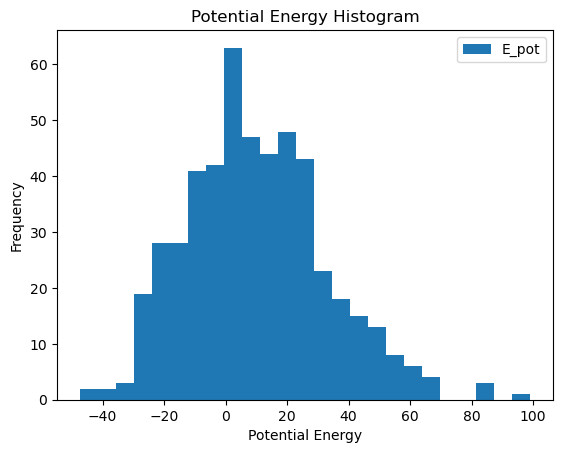

<Figure size 640x480 with 0 Axes>

In [18]:
pot_en = np.loadtxt('./Epot.xvg', skiprows = 24)
time = pot_en[:,0]
E_p = pot_en[:,1]
plt.hist(E_p, bins = 25)
plt.legend(['E_pot'])
plt.xlabel('Potential Energy')
plt.ylabel('Frequency')
plt.title('Potential Energy Histogram')
plt.show()
plt.savefig('../Figures/PE_histogram_600.png')